energy (0.32893861604082075, 0.0)
energy SpearmanrResult(correlation=0.33971002582528853, pvalue=0.0)
liveness (-0.0789591170346466, 3.6046633291861957e-239)
liveness SpearmanrResult(correlation=-0.1070010969392933, pvalue=0.0)
tempo (0.09498457726879468, 0.0)
tempo SpearmanrResult(correlation=0.0939074175331141, pvalue=0.0)
speechiness (-0.19532890196486297, 0.0)
speechiness SpearmanrResult(correlation=-0.17706151678603904, pvalue=0.0)
loudness (0.33719410928864124, 0.0)
loudness SpearmanrResult(correlation=0.35008003256624043, pvalue=0.0)
key (0.0019511130204751712, 0.4151994206837584)
key SpearmanrResult(correlation=0.001498277516058268, pvalue=0.5315280072142463)
mode (0.007652216688175146, 0.0013954883149435735)
mode SpearmanrResult(correlation=0.014112595161047806, pvalue=3.777382860567547e-09)
year (0.5132267998805851, 0.0)
year SpearmanrResult(correlation=0.5074969129019841, pvalue=0.0)
valence (0.06347111097004506, 4.1392790441262084e-155)
valence SpearmanrResult(correlation=0

/Users/caxi.w/opt/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


loudness (0.9605179124630887, 3.870804426474488e-55)
loudness SpearmanrResult(correlation=0.9607648120166529, pvalue=2.8810278103805456e-55)
key (0.11872455498522816, 0.24427951229963518)
key SpearmanrResult(correlation=0.2354501318162918, pvalue=0.019603894649021125)
mode (-0.43835040779868684, 6.349034073219437e-06)
mode SpearmanrResult(correlation=-0.6295713047154377, pvalue=3.814713102812436e-12)
year (0.9900007595678602, 1.8085070027176417e-83)
year SpearmanrResult(correlation=0.9887977868379041, pvalue=4.10581315157782e-81)
valence (-0.1576737112625642, 0.12100254561083969)
valence SpearmanrResult(correlation=-0.08634419090972845, pvalue=0.3979003342459593)
instrumentalness (-0.9589398331438495, 2.447383826757832e-54)
instrumentalness SpearmanrResult(correlation=-0.9884092343591606, pvalue=2.0906976197130853e-80)
duration_ms (-0.40511242064951736, 3.506441856943912e-05)
duration_ms SpearmanrResult(correlation=-0.30396751015307716, pvalue=0.0023434167244664435)
acousticness (-0.76

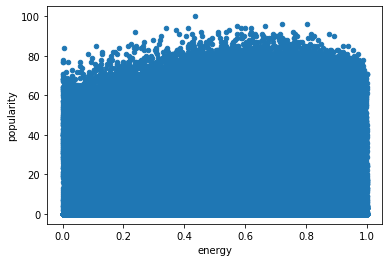

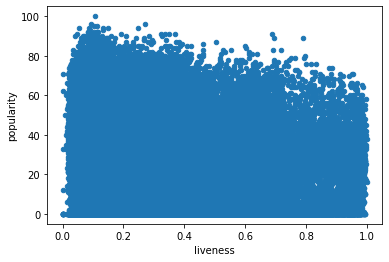

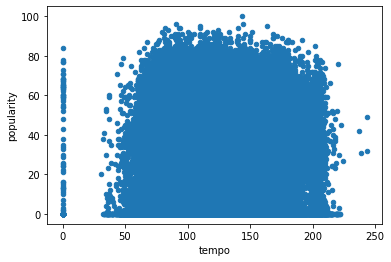

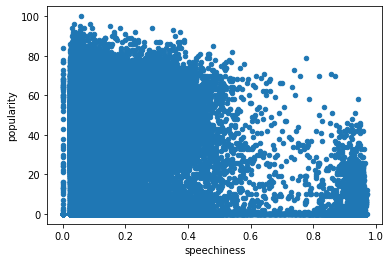

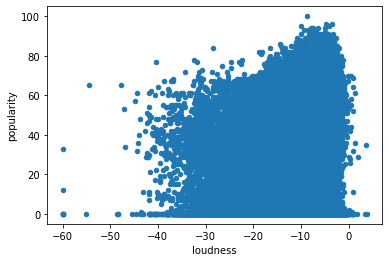

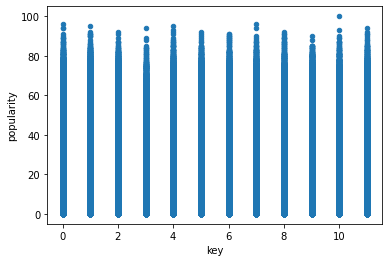

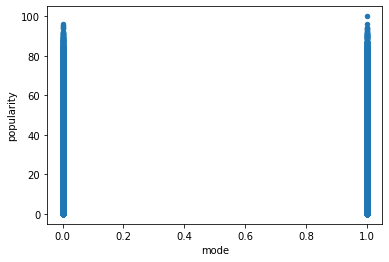

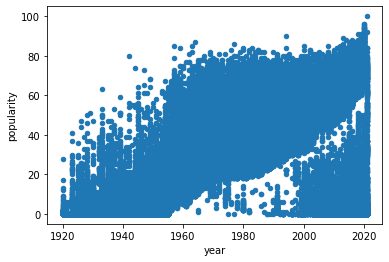

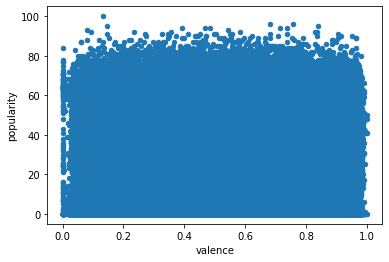

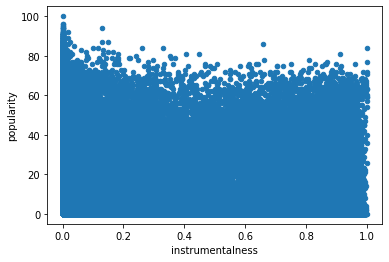

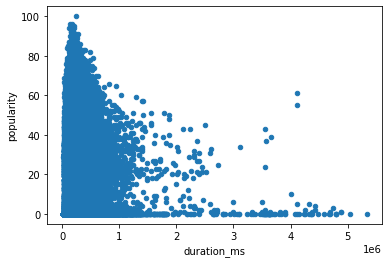

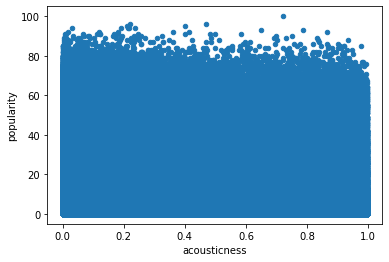

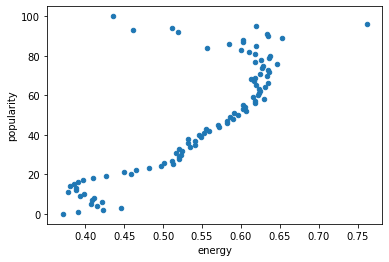

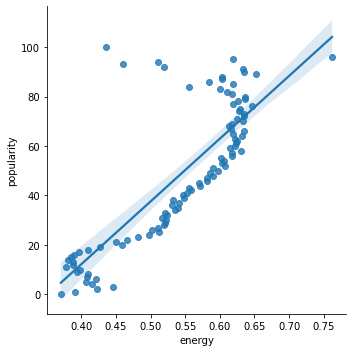

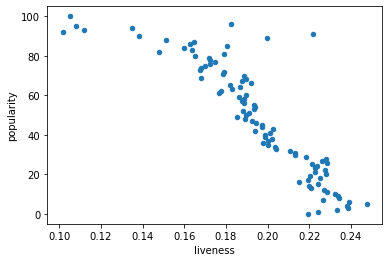

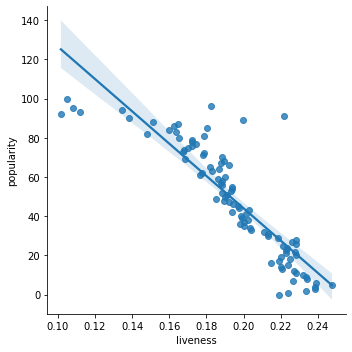

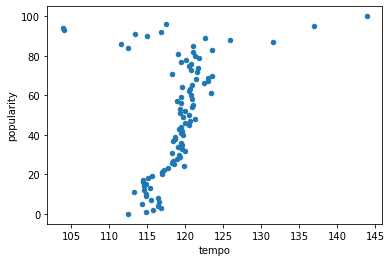

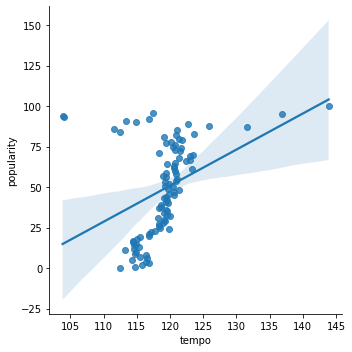

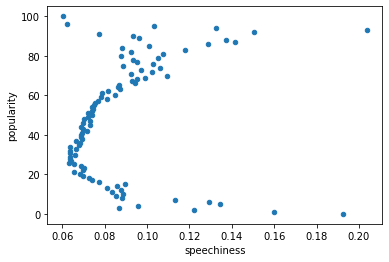

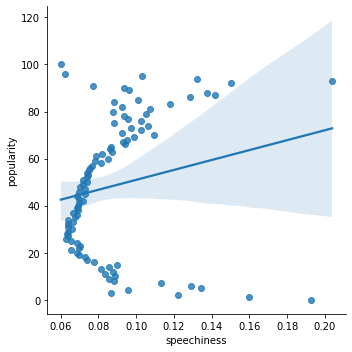

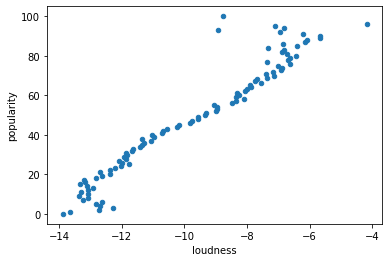

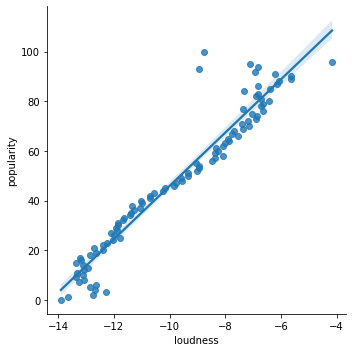

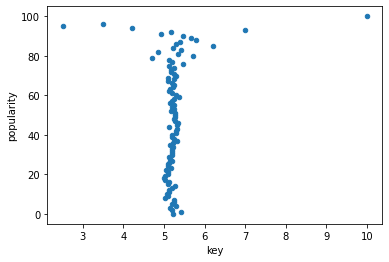

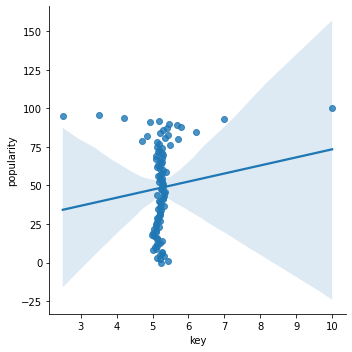

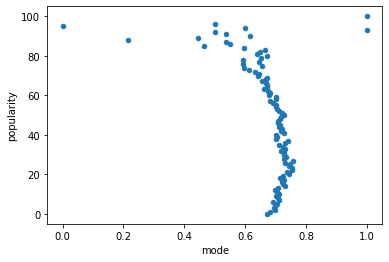

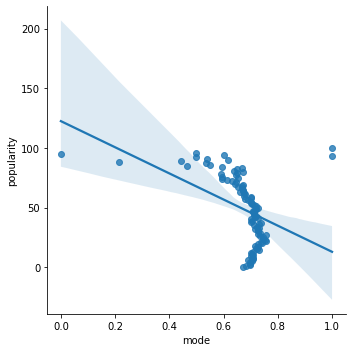

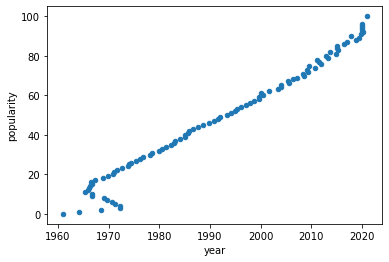

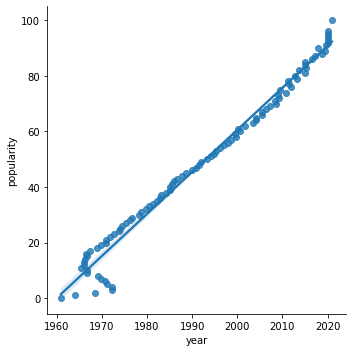

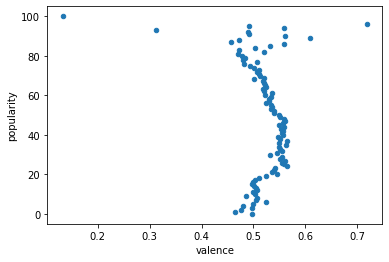

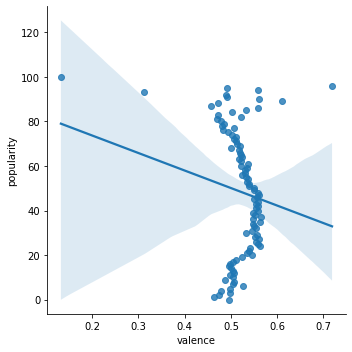

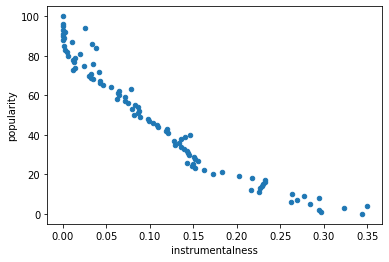

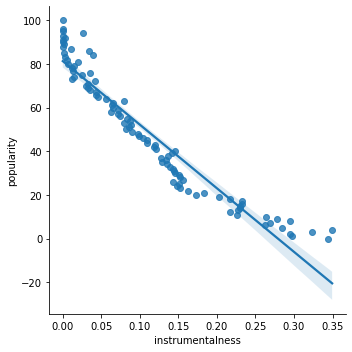

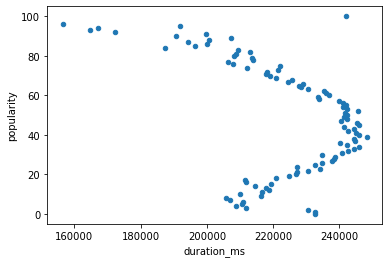

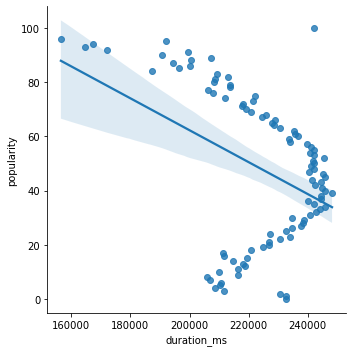

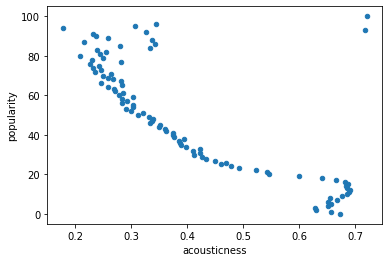

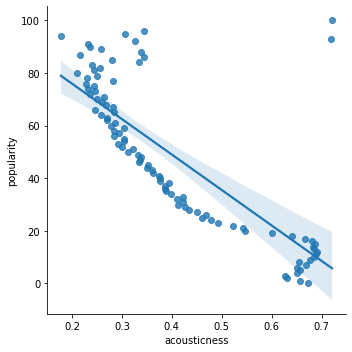

In [83]:
#data statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats
from scipy.stats import chi2_contingency 
import time
df = pd.read_csv('spotify_cleaned.csv')
##draw scatterplot and use corrlation (no need for association as its for categorical data
l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness"]
for i in range(len(l)):
        df.plot.scatter(x=l[i], y='popularity')
        print(l[i], stats.pearsonr(df[l[i]], df['popularity']))
        print(l[i], stats.spearmanr(df[l[i]], df['popularity']))



df1 = df.groupby('popularity')
df1 = df1.mean()
df1 = df1.reset_index()

##draw scatterplot and use corrlation (no need for association as its for categorical data
l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness"]
for i in range(len(l)):
        df1.plot.scatter(x=l[i], y='popularity')
        sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired")
        print(l[i], stats.pearsonr(df1[l[i]], df1['popularity']))
        print(l[i], stats.spearmanr(df1[l[i]], df1['popularity']))




In [84]:
#mahine learning
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
df = pd.read_csv('spotify_cleaned.csv')

df2 = pd.read_csv('spotify_cleaned.csv')
df2.drop(df2.index[df2['popularity'] == 0], inplace=True)

df3 = pd.read_csv('spotify_cleaned.csv')
df3.drop(df2.index[df2['year'] < 1980], inplace=True)

X = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness']]
y = df3['popularity']
mean = y.mean()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_bool_train = [i > mean for i in y_train]
for i in range(len(y_bool_train)):
    if y_bool_train[i]:
        y_bool_train[i] = 1
    else:
        y_bool_train[i] = 0
y_bool_test = [i > mean for i in y_test]
for i in range(len(y_bool_test)):
    if y_bool_test[i]:
        y_bool_test[i] = 1
    else:
        y_bool_test[i] = 0
print(sum(y_bool_test))
print(len(y_bool_test))
print(sum(y_bool_train))
print(len(y_bool_train))

11784
22506
47452
90023


In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#model1 = LogisticRegression(random_state = 0, solver = 'liblinear', class_weight = {'loudness' : 0.22, 'energy' : 0.2, 'instrumentalness' : 0.22, 'acousticness': 0.18, 'liveness': 0.2})
#model1 = LogisticRegression()
#params = {'C': [0.1, 1, 10],
#          'solver': ['newton-cg','lbfgs', 'libliner', 'sag', 'saga'],
#          'max_iter': [50, 100, 250]}

# Create Gridsearch
#grid = GridSearchCV(estimator = model1,
#                    param_grid = params,
#                    n_jobs = -1, 
#                    verbose = 1, 
#                    cv = 3)
#result = grid.fit(X_train, y_train)
#print("Best: %f using %s" % (result.best_score_, result.best_params_))

model1 = LogisticRegression(solver='liblinear')
lrscores = cross_val_score(model1, X_train, y_bool_train, scoring='f1', cv=5)
print(lrscores)
print('avg cv score: ' + str(sum(lrscores)/len(lrscores)))
model1.fit(X_train, y_bool_train)
pred = model1.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))
print('')

model2 = tree.DecisionTreeClassifier()
dtscores = cross_val_score(model2, X_train, y_bool_train, scoring='f1', cv=5)
print(dtscores)
print('avg cv score: ' + str(sum(dtscores)/len(dtscores)))
model2.fit(X_train, y_bool_train)
pred = model2.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))
print('')

model3 = KNeighborsRegressor()
knnscores = cross_val_score(model3, X_train, y_bool_train, scoring='r2', cv=5)
print(knnscores)
print('avg cv score: ' + str(sum(knnscores)/len(knnscores)))
model3.fit(X_train, y_train)
pred = model3.predict(X_test)
print('score on test data: ' + str(r2_score(y_test, pred)))
print('')

model4 = GradientBoostingRegressor()
gbscores = cross_val_score(model4, X_train, y_bool_train, scoring='r2', cv=5)
print(gbscores)
print('avg cv score: ' + str(sum(gbscores)/len(gbscores)))
model4.fit(X_train, y_train)
pred = model4.predict(X_test)
print('score on test data: ' + str(r2_score(y_test, pred)))
print('')

[0.76610991 0.76426949 0.76698784 0.7628072  0.76314462]
avg cv score: 0.7646638104388446
score on test data: 0.7595997396680768

[0.72778367 0.73039373 0.72950689 0.72610442 0.73466127]
avg cv score: 0.729689995951971
score on test data: 0.7331250267517014

[0.26444713 0.26932026 0.26248301 0.27443871 0.25912292]
avg cv score: 0.26596240394666176
score on test data: 0.3185227370540571

[0.37068716 0.36806149 0.36781105 0.36833539 0.36798276]
avg cv score: 0.3685755723550173
score on test data: 0.4200677410143514

